In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Adaline
-Using Batch Gradient Descent

-learning rule is also called the LMS (least mean square) algorithm and the Widrow-Hoff learning rule.

Resources: 

http://www.cs.utsa.edu/~bylander/cs4793/learnsc32.pdf

https://medium.com/@benjamindavidfraser/understanding-basic-machine-learning-with-python-perceptrons-and-artificial-neurons-dfae8fe61700

In [2]:
#Just to show how Adaline looks like
from IPython.display import Image
i = Image(url='https://cdn-images-1.medium.com/max/1600/1*BoPvH_toJiDr7OcK8bKWXQ.png')
i

In [3]:
class AdalineGD(object):
    def __init__(self, alpha = 0.01, n_iter = 50):
        self.alpha = alpha
        self.n_iter = n_iter
        
    def fit(self, X, y):
        #X :  is a matrix of dimension number_of_samples x number_of_features
        #y : is a column vector or target value of shape number_of_samples x 1
        
        #initializing weight vectors with zeros
        #w_ : weight vector
        #X.shape[1] is the number of columns/features, we need same number of weights
        self.w_ = np.zeros(1+X.shape[1]) 
        #list to append costs for all iterations
        self.cost_ = []
        
        #Batch Gradient Descent, that is all samples in every iteration is taken into consideration
        for i in range(self.n_iter):
            #output is y_hat, this  is continous value, after activation, before Quantizer/threshold
            y_hat = self.net_input(X) 
            
            errors = (y - y_hat) # target - prediction
            
            self.w_[1:] += self.alpha * X.T.dot(errors)
            self.w_[0] += self.alpha * errors.sum()
            
            cost = (errors**2).sum() / 2.0 #squared error function/cost function
            self.cost_.append(cost)
            
        return self #trained instance/object
    
    #linear combiner
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    #liner activation, same as net input, no change in value
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    #prediction based on threshold
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Iris Dataset and Training AdalineGD

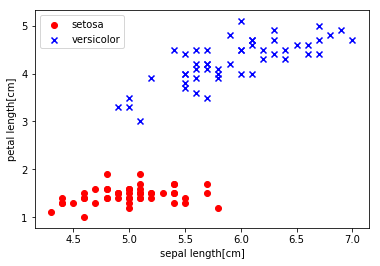

In [4]:
#read dataset
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
#df.iloc[10:20, 0:] #this shows all samples from 10 to 19th row and all columns! Use iloc use indexing
df.head() #this shows first five samples
y = df.iloc[0:100, 4].values  #slicing first 100 sample's target/y values

#Since we are dealing with binary classification problem using perceptron
# we are going to assign 1 and -1 to column 4's values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values #100 samples, 2 feautes  for each sample 

#ploting samples, 0-49 : setosa, 50-99 : versicolor
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length[cm]') #first column of features
plt.ylabel('petal length[cm]') #second column of featues
plt.legend(loc='upper left')
plt.show()

## Training with two different alpha/eta/learning rate and plotting

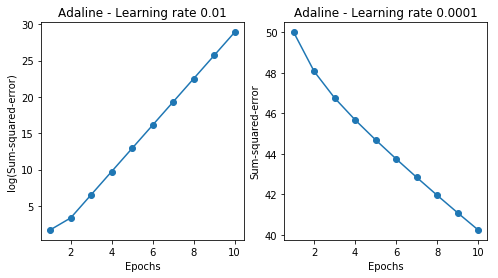

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ada1 = AdalineGD(n_iter=10, alpha=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, alpha=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

In [6]:
#code to draw decision region
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

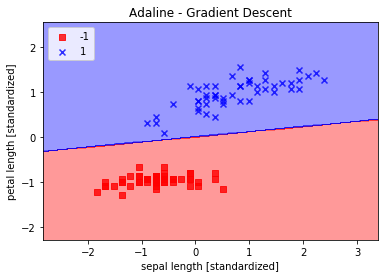

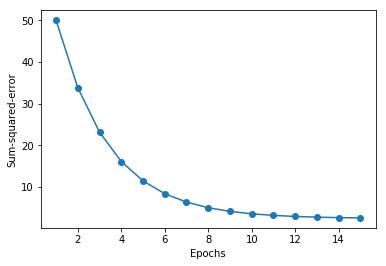

In [7]:
#Train after standardization , what is standardization?
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada = AdalineGD(n_iter=15, alpha=0.01)
ada.fit(X_std, y)

#decision region
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()
